#1. Import Libraries

In [42]:
# Data Wrangling
import pandas as pd
import numpy as np
import missingno as msno

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#2. Import and Read Data


In [43]:
df = pd.read_csv("/content/assignment_raw_data.csv")
genotypes = pd.read_parquet("/content/assignment_genotypes_subsample.parquet.gz").reset_index()
genotypes = genotypes.rename(columns={"index":"rfid"}).astype({"rfid":int})

#3. Exploratory Data Analysis


###Data types, missing data, and summary statistics

In [44]:
# Non-null count and data types of raw data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 50 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   box                                     862 non-null    object 
 1   coatcolor                               862 non-null    object 
 2   cohort                                  862 non-null    object 
 3   cued_age                                862 non-null    int64  
 4   epm1_age                                862 non-null    int64  
 5   ext01_age                               862 non-null    int64  
 6   lga01_age                               862 non-null    int64  
 7   oft1_age                                862 non-null    int64  
 8   pr_age                                  862 non-null    int64  
 9   prime_age                               862 non-null    int64  
 10  room                                    862 non-null    object

In [45]:
# Missing raw data by columns 

df.isnull().sum().sort_values(ascending = False)

fst_float                                 32
fst_swim                                  32
fst_dive                                  32
fst_climb                                 32
oft_time_diff                             10
oft_distance_diff                         10
epm_percent_open_diff                      7
oft_time_2                                 6
epm_percent_open_2                         6
oft_distance_2                             6
oft_distance_1                             4
oft_time_1                                 4
epm_percent_closed_1                       2
epm_percent_closed_diff                    2
tf_test_1                                  1
epm_percent_closed_2                       1
epm_percent_open_1                         1
tf_test_diff                               1
tf_test_2                                  0
tf_bl_1                                    0
tf_bl_2                                    0
coatcolor                                  0
room_box  

<Axes: >

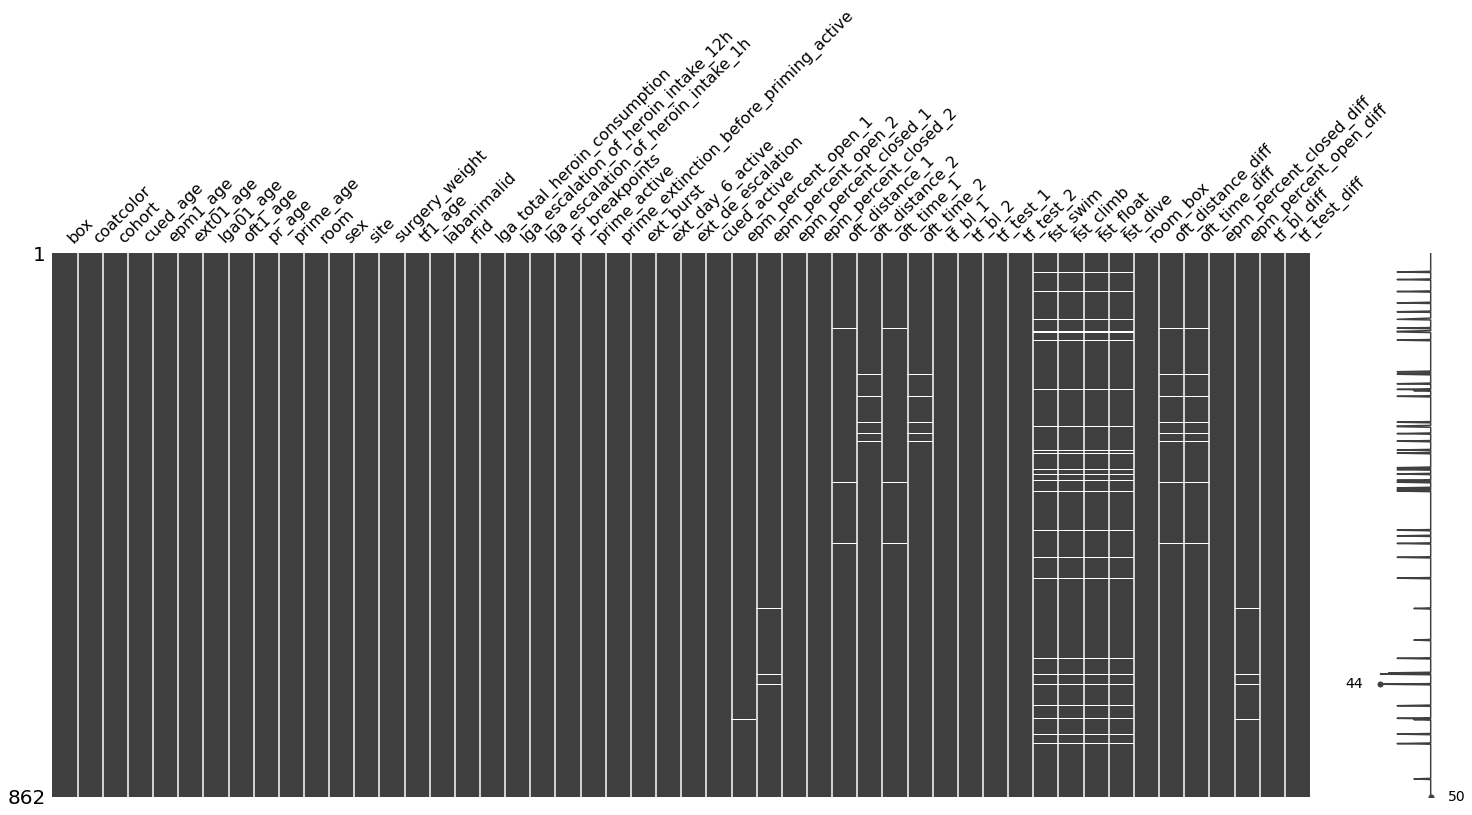

In [46]:
# Visualization of missing raw data 

msno.matrix(df)

In [47]:
# Non-null count and data types of genotype data set

genotypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Columns: 3001 entries, rfid to 1_3373466_dosage
dtypes: float64(3000), int64(1)
memory usage: 19.7 MB


In [48]:
# Missing genotype data by columns 

genotypes.isnull().sum().sort_values(ascending = False)

1_3818091_dosage    149
1_3818572_dosage    142
1_3819104_dosage    141
1_3810240_dosage    124
1_3821572_dosage    116
                   ... 
1_4073383_dosage      0
1_2545458_dosage      0
1_4043915_dosage      0
1_3243872_dosage      0
1_3144440_dosage      0
Length: 3001, dtype: int64

###Analysis of Individual Traits

####Covariate Catagorical Trait: Sex

Text(0.5, 1.0, 'Covariate Catagorical Trait: Sex')

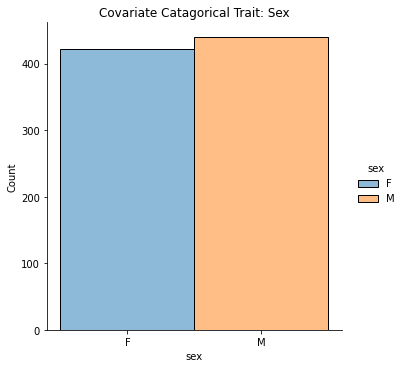

In [49]:
sns.displot(data=df, x='sex', hue='sex')
plt.title("Covariate Catagorical Trait: Sex")

####Covariate Catagorical Trait: Cohort

In [50]:
df['cohort'].value_counts()

C13italy    36
C11us       36
C13us       36
C14us       36
C12us       36
C08us       36
C07us       36
C06us       35
C10italy    35
C10us       35
C07italy    34
C09italy    34
C14italy    34
C12italy    33
C09us       32
C08italy    32
C03us       30
C11italy    28
C06italy    27
C05italy    27
C04italy    27
C05us       25
C15us       24
C17us       24
C04us       23
C16italy    23
C02us       22
C03italy    15
C16us       11
Name: cohort, dtype: int64

Text(0.5, 1.0, 'Covariate Catagorical Trait: Cohort')

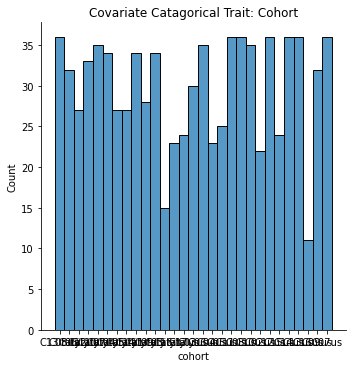

In [51]:
sns.displot(data=df, x='cohort')
plt.title("Covariate Catagorical Trait: Cohort")

####Covariate Catagorical Trait: Site

Text(0.5, 1.0, 'Covariate Catagorical Trait: Site')

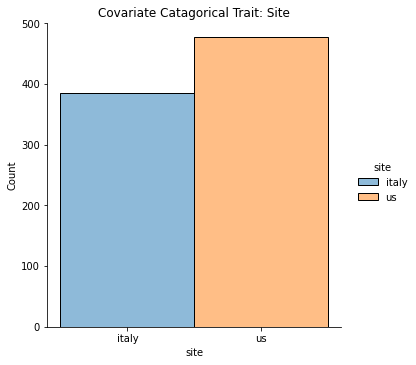

In [52]:
sns.displot(data=df, x='site', hue='site')
plt.title("Covariate Catagorical Trait: Site")

####Covariate Categorical Trait: Room_Box

In [53]:
df['room_box'].value_counts()

R_1     136
R_3     128
L_2      70
L_4      63
R_2      27
R_4      26
48_7     24
48_3     24
48_5     24
46_8     23
48_4     23
48_8     23
48_6     23
46_2     23
46_1     22
48_1     22
48_2     22
46_4     22
46_3     21
46_5     20
46_6     20
46_7     19
O_1       6
47_3      4
O_2       4
O_3       4
47_2      4
L_5       4
47_6      4
47_1      4
O_4       3
47_4      2
47_5      2
47_8      2
O_5       2
50_3      2
50_4      2
L_1       2
R_6       2
47_7      1
50_1      1
50_2      1
50_6      1
Name: room_box, dtype: int64

Text(0.5, 1.0, 'Covariate Categorical Trait: room_box')

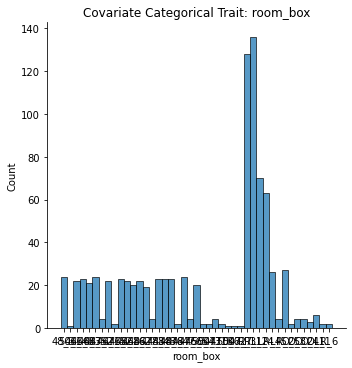

In [54]:
sns.displot(data=df, x='room_box')
plt.title("Covariate Categorical Trait: room_box")

####Covariate Continuous Trait: Surgery Weight

In [55]:
df['surgery_weight'].describe().transpose()

count    862.000000
mean     230.085847
std       56.264925
min      123.000000
25%      182.000000
50%      215.500000
75%      280.000000
max      380.000000
Name: surgery_weight, dtype: float64

Text(0.5, 1.0, 'Covariate Continuous Trait: Surgery Weight')

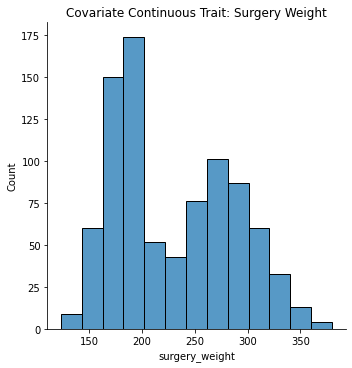

In [56]:
sns.displot(data=df, x='surgery_weight')
plt.title("Covariate Continuous Trait: Surgery Weight")

####Covariate Continuous Trait: Cued Age

In [57]:
df['cued_age'].describe().transpose()

count    862.000000
mean     112.218097
std        5.381497
min       92.000000
25%      108.000000
50%      113.000000
75%      115.000000
max      123.000000
Name: cued_age, dtype: float64

In [58]:
df['cued_age'].value_counts()

114    110
115    109
107     92
113     89
116     71
108     66
106     40
112     35
109     30
110     27
120     25
122     25
105     21
117     21
121     20
118     18
111     11
123     10
119      9
95       6
93       4
94       4
100      4
92       3
104      3
99       3
102      3
101      2
103      1
Name: cued_age, dtype: int64

Text(0.5, 1.0, 'Covariate Continuous Trait: Cued Age')

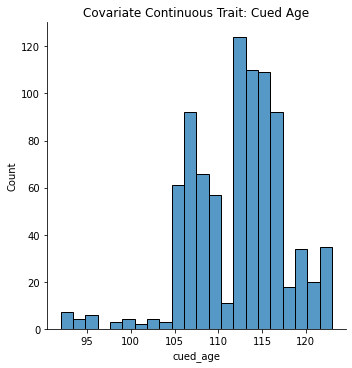

In [59]:
sns.displot(data=df, x='cued_age')
plt.title("Covariate Continuous Trait: Cued Age")

####Trait: Cued-Active

Text(0.5, 1.0, 'Cued Active Distribution')

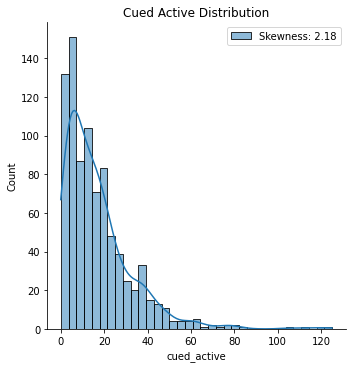

In [60]:
sns.displot(data=df, x='cued_active', kde=True, label= 'Skewness: %.2f'%(df['cued_active'].skew()))
plt.legend(loc='best')
plt.title("Cued Active Distribution")

In [61]:
# Apply log transformation to cued active column to reduce skewness

df['cued_active_norm'] = df['cued_active'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'Cued Active Distribution After Log Transformation')

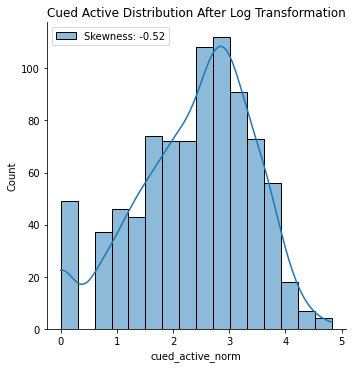

In [62]:
sns.displot(data=df, x='cued_active_norm', kde=True, label= 'Skewness: %.2f'%(df['cued_active_norm'].skew()))
plt.legend(loc='best')
plt.title("Cued Active Distribution After Log Transformation")